See the parent `070_Input_prep.ipynb` notebook.

#### Notebook setup

In [1]:
# %load /home/kmc3817/software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
#%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2


Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


In [2]:
from arrau import *
from arrau.modify import modify_array
from fullwavepy.ioapi.segy import SgyFile, array2sgy
from fullwavepy.dsp.su import *
from fullwavepy.dsp.wavelet import *

In [7]:
import fullwavepy.dsp.wavelet
help(fullwavepy.dsp.wavelet)

Help on module fullwavepy.dsp.wavelet in fullwavepy.dsp:

NAME
    fullwavepy.dsp.wavelet

DESCRIPTION
    (c) 2019-2020 Kajetan Chrapkiewicz.
    Copywright: Ask for permission writing to k.chrapkiewicz17@imperial.ac.uk.

FUNCTIONS
    align(A, i_target, **kwargs)
        A : array 
          (ntraces, 1, nsamps)
        
        i_target : int 
          Index of the trace in A
          that other traces will be 
          aligned to.
        
        Aa : array 
          Array of the same shape as A with 
          traces aligned to i_target-trace 
          of the array A.
    
    derive_wavelet(**kwargs)
        Using synthetic Green's function
    
    dist_l2(v, w)
        Euclidean (L2) distance between
        two vectors.
    
    export_dobs(dobs, fname, dt, s_dobs, g_dobs, **kwargs)
        These fields are parsed by SP along with 
        a few others that should be correct by default.
    
    extract_wavelet(fname, proj_name, tend=1.5, ntaper=50, **kwargs)
        fna

# Theory

# Workflow

## Selecting traces

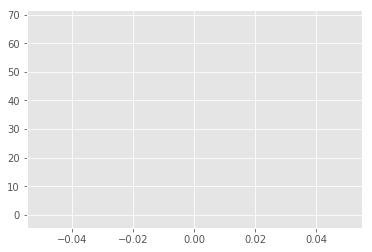

In [77]:
name = 'ok.sgy'
path = 'data'
fname = '%s/%s' % (path, name)
dt = 0.005 # s
s, g = read_coords(fname)
A = SgyFile(name, path).read()
A = A[...,:1000] # NOTE
A = modify_array(A, norm='max')
Arr2d(A).plot(mode='wiggle', gap=1)

## Aligning traces

In [4]:
# s, g = read_coords(data_fname)
# A = read_any(data_fname)
# plot(A, norm='rms', cmap='seismic', ptype='wiggle', dt=0.005, gap=20)
# plt.xlim(0.2,1)

In [76]:
i_target = 0
nx 
Aa = Arr2d(align(A.arr, i_target))
# s_dobs = s[i_target]
# g_dobs = g[i_target]
# plot(Aa, norm='rms', cmap='seismic', ptype='wiggle', dt=0.005, gap=20)
# plt.xlim(0.2,1)

OSError: A shape must have ny=1

## Aligning traces

## Filtering params

In [73]:
f1 = 2
f2 = 3
f3 = 10
f4 = 14
zerophase = False

## Observed trace

In [5]:
i_target = 0
Aa = align(A, i_target)
s_dobs = s[i_target]
g_dobs = g[i_target]
plot(Aa, norm='rms', cmap='seismic', ptype='wiggle', dt=0.005, gap=20)
plt.xlim(0.2,1)

OSError: A shape must have ny=1

In [6]:
dobs = stack(Aa)
plot(dobs, dt=dt)
plt.xlim(0.3, 2)

NameError: name 'Aa' is not defined

In [7]:
times = (reverbs(data_fname, 2))[i_target]
tstart, tend = times
dobs_m = su_process(dobs, su_mute, dt, [tend], mode='bottom', ntaper=50)
plot(dobs_m, dt=dt)
plt.xlim(0,2)

NameError: name 'data_fname' is not defined

In [84]:
# test = su_process(dobs, su_filter_full, dt, **kwargs)
# plot(test, dt=dt)
# plt.xlim(0,5)

In [8]:
# THAT DOESN'T WORK BECAUSE I CHANGED ARGS OF filter function IN THE MEANTIME
kwargs =  {'f1': f1, 'f2': f2, 'f3': f3, 'f4': f4, 'zerophase': zerophase}
dobs_mf = su_process(dobs_m, su_filter_full, dt, **kwargs)
# THIS IS IMPORTANT <= SETS HEADER
export_dobs(dobs_mf, proj.inp.path+proj.name+'-RawSeis.sgy', dt, s_dobs, g_dobs)
# plot(dobs_mf, dt=dt)
# plt.xlim(0,4)
time_freq(dobs_mf, {'xlim': (0,4)}, {'xlim': (0,10)}, dt=dt)

NameError: name 'f1' is not defined

## Initial-guess wavelet

(0, 800.0)

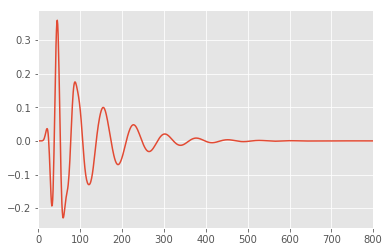

In [74]:
lll(40)
ns = int(1e4)
spike = np.zeros((1,1,ns))
spike[0] = 1
kwargs =  {'f1': f1, 'f2': f2, 'f3': f3, 'f4': f4, 'zerophase': zerophase}
spike = su_process(spike, su_filter, dt, **kwargs)
plt.plot(spike[0,0])
plt.xlim(0,8e2)

(0, 2000.0)

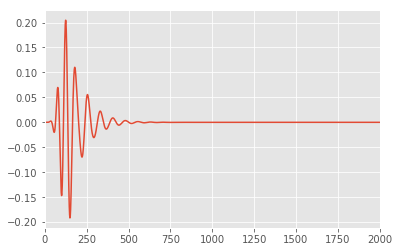

In [36]:
plt.plot(spike[0,0])
plt.xlim(0,2e3)

## dsyn

### Input

In [10]:
info = """
Generation of synthetic data for a matching filter.
Observed data: stacked clean traces within 100-300 offset, WHOI stations.

"""

In [11]:
margin = 5000 # m
ns = 1000
dx = 50      
x1 = min(s_dobs[0], g_dobs[0]) - margin    
x2 = max(s_dobs[0], g_dobs[0]) + margin     
y1 = min(s_dobs[1], g_dobs[1]) - margin      
y2 = max(s_dobs[1], g_dobs[1]) + margin   
z1 = 0
z2 = 2 * margin   
box = [x1, x2, y1, y2, z1, z2]
timespace = [box, dx, ns, dt]

NameError: name 's_dobs' is not defined

In [12]:
proj = ProjSynVsObs('p05', paths=paths_kmc, io='sgy', timespace=timespace, info=info)
proj.info.cat()
proj.dims

NameError: name 'ProjSynVsObs' is not defined

In [40]:
proj.inp.wavelet.prepare(spike, dt)

In [45]:
args_rawseis = [[proj.name+'-RawSeis.sgy']]
kwargs_wavelet = {'array': spike, 'dt': dt}
kwargs_sp = {'reciprocity': False}
args_truevp = [1500]
proj.inp.prepare(args_rawseis=args_rawseis, 
                 kwargs_wavelet=kwargs_wavelet,
                 args_truevp=args_truevp,
                 kwargs_sp=kwargs_sp
                )


 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to p05
 Preparing files for synthetics...

 Grid points in-line:                    201
 Grid points cross-line:                 206
 Grid points vertically:                 201
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            10000.0000    
 Model width (metres):             10250.0000    
 Model depth (metres):             10000.0000    

 Modelling time step (ms):         5.00000000    
 Output data delta-T (ms):         5.00000000    
 Output data length (ms):          5000.00000    
 Output data length (samples):          1000
 Time steps to model:                   1000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:       no
 Use FFID instead of SOURCE numbers:     yes
 FFID numbers are unique:     

(0, 10)

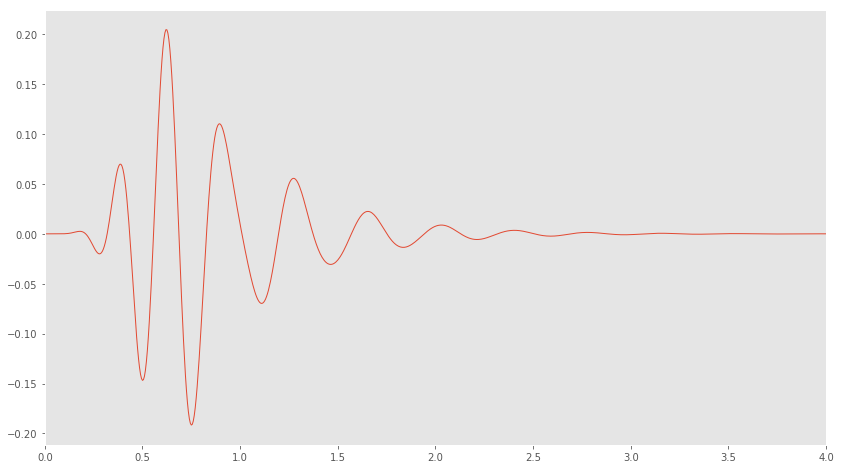

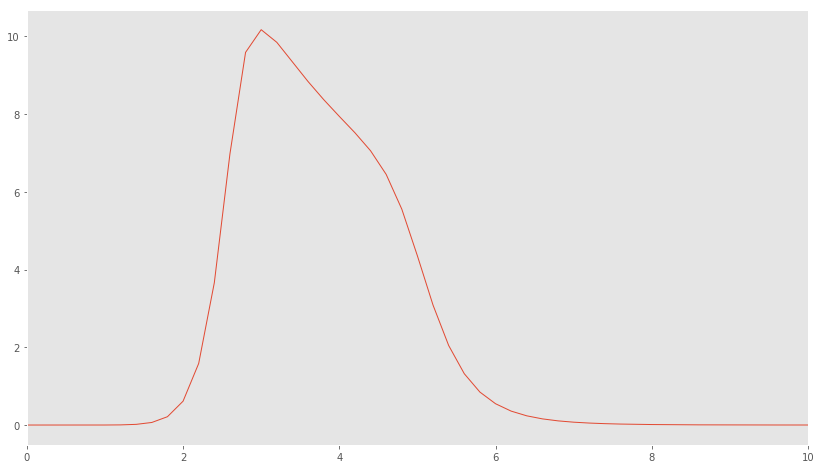

In [73]:
proj.inp.wavelet.plot(dt=dt)
plt.xlim(0,4)
plt.figure()
proj.inp.wavelet.plot(spect='ampl', dt=dt)
plt.xlim(0,10)

In [172]:
# proj.inp.outseis.plot(dt=dt)
# plt.xlim(0,4)
# proj.inp.wavelet.plot(spect='ampl', dt=dt)

### Output

In [50]:
proj.out.synerr.cat()

Content of  ./p05//out/p05-SynErr.log : 
 


In [51]:
# proj.out.synout.cat()

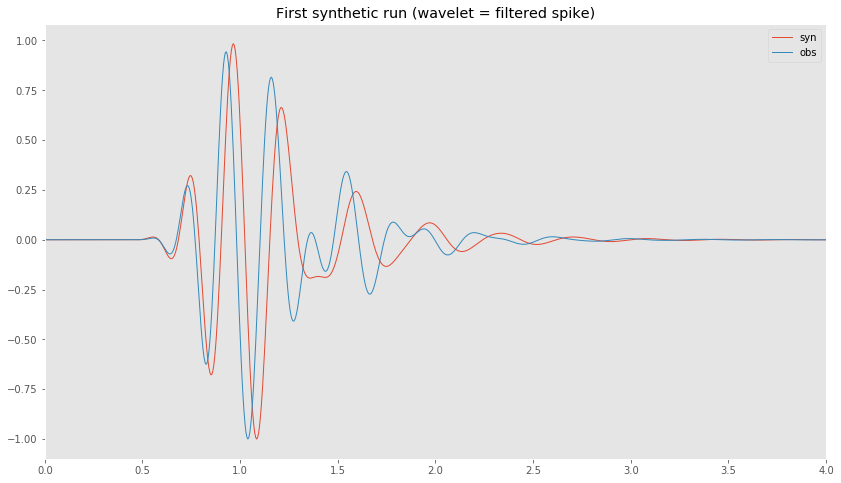

In [74]:
plt.title('First synthetic run (wavelet = filtered spike)')
proj.out.synth.plot(dt=dt, norm='max', llabels=['syn'])
proj.inp.outseis.plot(dt=dt, norm='max', llabels=['obs'])
plt.xlim(0,4)
plt.legend()

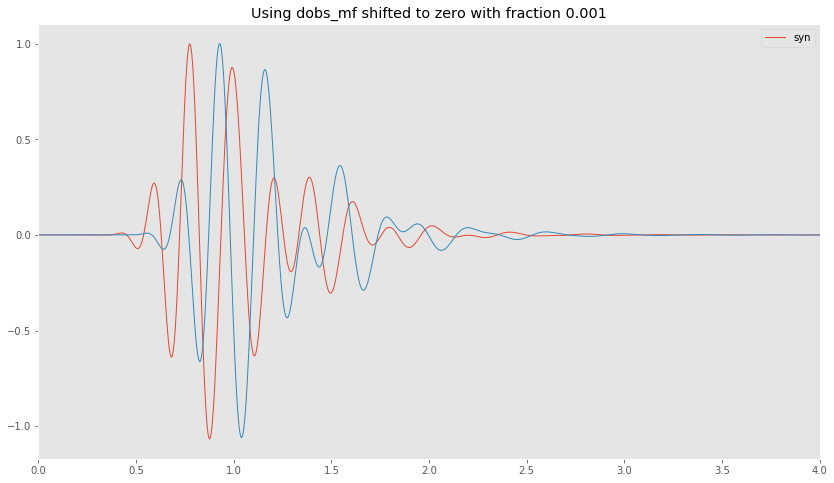

In [178]:
plt.title('Using dobs_mf shifted to zero with fraction 0.001')
proj.out.synth.plot(dt=dt, norm='max', llabels=['syn'])
proj.inp.outseis.plot(dt=dt, norm='max')
plt.xlim(0,4)
plt.legend()

## s1

In [13]:
s0 = proj.inp.wavelet.read()
dinp = proj.out.synth.read()
dout = proj.inp.outseis.read()
print(s0.shape, dinp.shape, dout.shape)
# plot(dinp, dt=dt, norm='max', llabels=['dinp (to shape)'])
# plot(dout, dt=dt, norm='max', llabels=['dout (desired)'])
# plt.xlim(0,4)
# plt.legend()

NameError: name 'proj' is not defined

In [25]:
# a = su_process(s0, su_decon, dt, pnoise=.001, d_inp=dinp, d_out=dout)
# plt.figure()
# plt.title(cap + ' s1')
# plot(a)
# plt.savefig(cap + ' s1.png')

# b = read_sushaper()
# plt.figure()
# plt.title(cap + ' w')
# plot(b)
# plt.savefig(cap + ' w.png') 

In [17]:
pad_ms = 20000
pad_ns = int(pad_ms / dt / 1000)

In [18]:
def pad(A, pad_ms, dt, mode):
    pad_ns = int(pad_ms / dt / 1000)
    if mode == 'no':
        Ap = A
    elif mode == 'trail':
        Ap = pad_traces(A, 2 * pad_ns)
    elif mode == 'both':
        Ap = su_process(A, su_pad, dt, pad_ms)
    
    return Ap

trail no both
Case 11
len(shaper) 9000


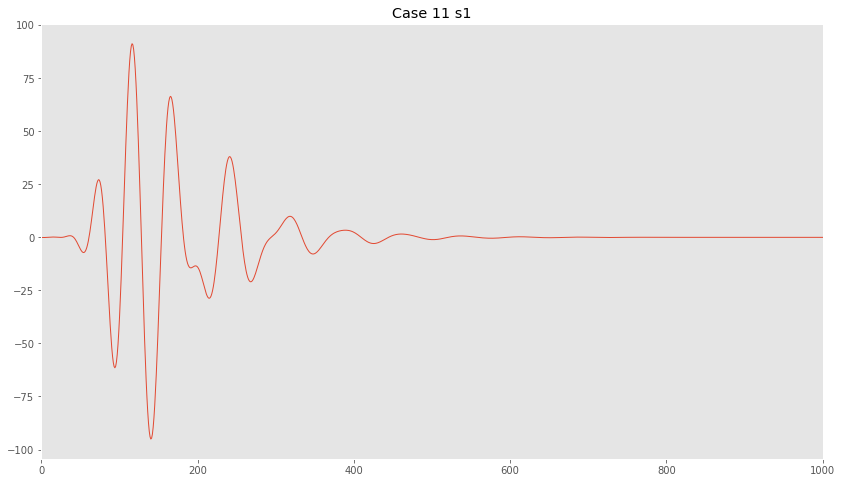

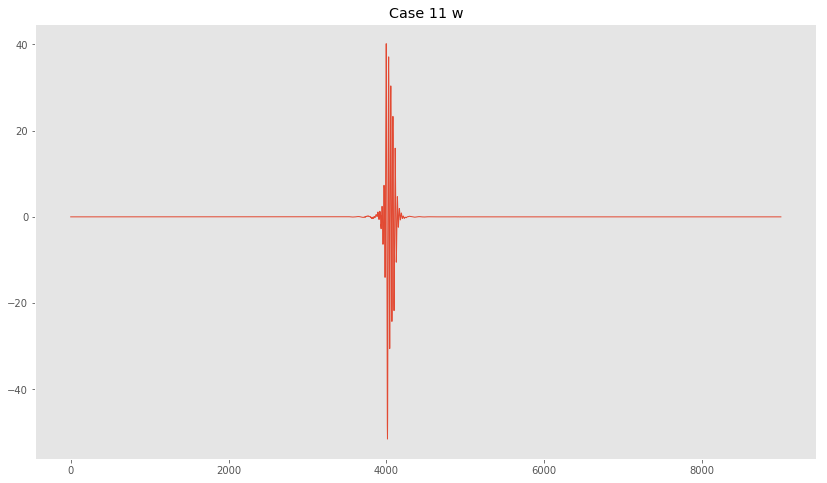

In [34]:
possbs = ['no', 'trail', 'both']
i = -1
for mode_s0 in possbs:
    for mode_dinp in possbs:
        for mode_dout in possbs:
            i += 1
            if i != 11:
                continue
            cap = 'Case ' + str(i)
            print(mode_s0, mode_dinp, mode_dout)
            print(cap)
            s0_p = pad(s0, pad_ms, dt, mode_s0)
            dinp_p = pad(dinp, pad_ms, dt, mode_dinp)
            dout_p = pad(dout, pad_ms, dt, mode_dout)
            
#             plt.figure()
#             plt.title(cap)
#             plot(s0_p, dt=dt, norm='max', llabels=['init. guess'])
#             plot(dinp_p, dt=dt, norm='max', llabels=['dinp (to shape)'])
#             plot(dout_p, dt=dt, norm='max', llabels=['dout (desired)'])
#             plt.legend()    
#             plt.savefig('input_' + str(i) + '.png')
            a = su_process(s0_p, su_decon, dt, pnoise=.001, d_inp=dinp_p, d_out=dout_p)
            plt.figure()
            plt.title(cap + ' s1')            
            plot(a)
            plt.xlim(0,1000)
#             plt.savefig(cap + ' s1.png')
#             plt.close()
            
            b = read_sushaper()
            plt.figure()
            plt.title(cap + ' w')            
            plot(b)
#             plt.savefig(cap + ' w.png')
#             plt.close()
            

In [36]:
b.shape

(1, 1, 9000)

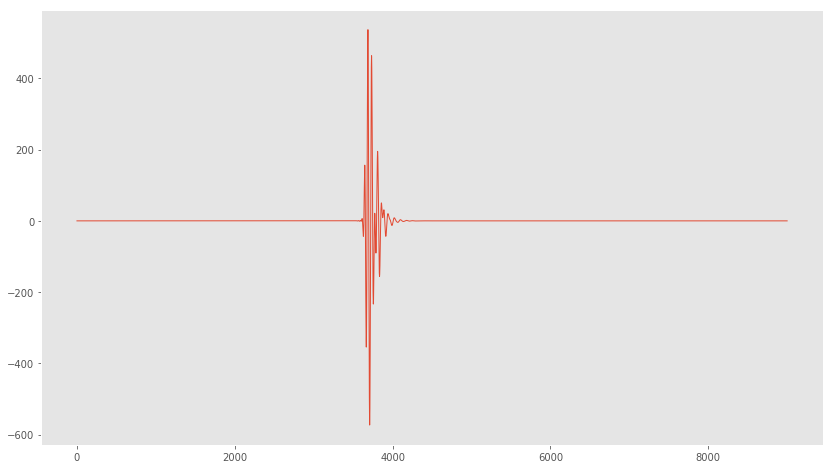

In [40]:
plt.plot(np.convolve(b[0][0], dinp_p[0][0], mode='same'))

(0, 1000)

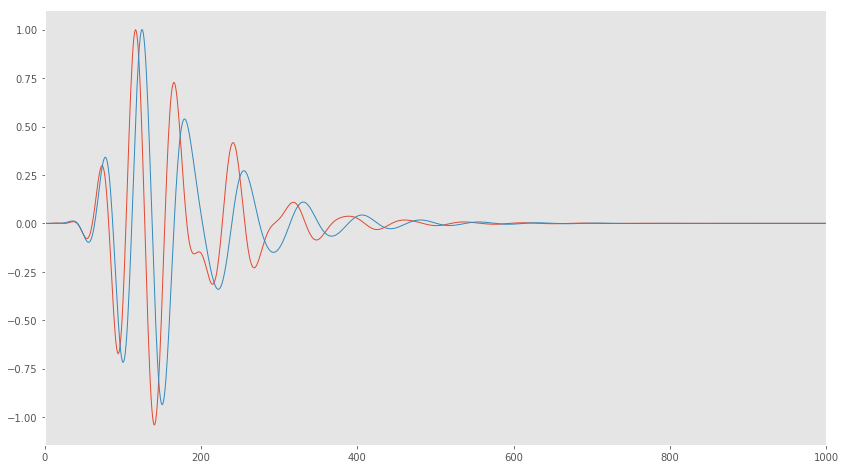

In [52]:
plot(a, norm='max')
plot(s0, norm='max')
plt.xlim(0,1000)

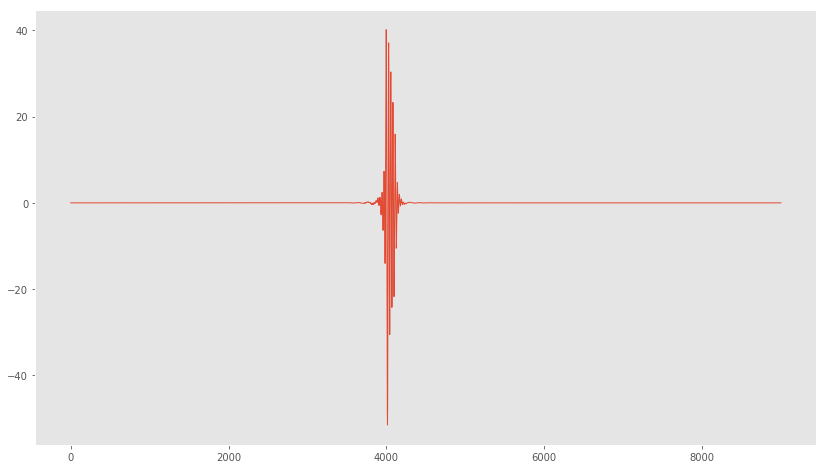

In [31]:
plot(b)

In [58]:
!suresamp

                                                                   
 SURESAMP - Resample in time                                       
                                                                   
 suresamp <stdin >stdout  [optional parameters]                    
                                                                   
 Required parameters:                                              
     none                                                          
                                                                   
 Optional Parameters:                                              
    nt=tr.ns    number of time samples on output                   
    dt=         time sampling interval on output                   
                default is:                                        
                tr.dt/10^6     seismic data                        
                tr.d1          non-seismic data                    
    tmin=       time of first sample in output  

In [61]:
a_cut = np.zeros((1,1,1000))
a_cut[0][0] = a[0][0][ :1000]
array2sgy('wavelet_19-09-22.sgy', a_cut, dt)
!segyread tape='wavelet_19-09-22.sgy' | suresamp rf=2 | segyhdrs | segywrite tape='wavelet_19-09-22.sgy' 

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00178547 s, 1.8 MB/s
6+1 records in
1+0 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.000111997 s, 28.6 MB/s


In [ ]:
# search for sweet spot

In [26]:
possbs = ['no', 'trail', 'both']
i = 0
for mode_s0 in possbs:
    for mode_dinp in possbs:
        for mode_dout in possbs:
            cap = 'Case ' + str(i)
            print(cap)
            s0_p = pad(s0, pad_ms, dt, mode_s0)
            dinp_p = pad(dinp, pad_ms, dt, mode_dinp)
            dout_p = pad(dout, pad_ms, dt, mode_dout)
            
#             plt.figure()
#             plt.title(cap)
#             plot(s0_p, dt=dt, norm='max', llabels=['init. guess'])
#             plot(dinp_p, dt=dt, norm='max', llabels=['dinp (to shape)'])
#             plot(dout_p, dt=dt, norm='max', llabels=['dout (desired)'])
#             plt.legend()    
#             plt.savefig('input_' + str(i) + '.png')
            a = su_process(s0_p, su_decon, dt, pnoise=.001, d_inp=dinp_p, d_out=dout_p)
            plt.figure()
            plt.title(cap + ' s1')            
            plot(a)
            plt.savefig(cap + ' s1.png')
            plt.close()
            
            b = read_sushaper()
            plt.figure()
            plt.title(cap + ' w')            
            plot(b)
            plt.savefig(cap + ' w.png')
            plt.close()
            i += 1

Case 0
len(shaper) 1000
Case 1
len(shaper) 1000
Case 2
len(shaper) 1000
Case 3
len(shaper) 1000
Case 4
len(shaper) 1000
Case 5
len(shaper) 1000
Case 6
len(shaper) 1000
Case 7
len(shaper) 1000
Case 8
len(shaper) 1000
Case 9
len(shaper) 9000
Case 10
len(shaper) 9000
Case 11
len(shaper) 9000
Case 12
len(shaper) 9000
Case 13
len(shaper) 9000
Case 14
len(shaper) 9000
Case 15
len(shaper) 9000
Case 16
len(shaper) 9000
Case 17
len(shaper) 9000
Case 18
len(shaper) 9000
Case 19
len(shaper) 9000
Case 20
len(shaper) 9000
Case 21
len(shaper) 9000
Case 22
len(shaper) 9000
Case 23
len(shaper) 9000
Case 24
len(shaper) 9000
Case 25
len(shaper) 9000
Case 26
len(shaper) 9000


(1, 1, 9000) (1, 1, 9000) (1, 1, 9000)


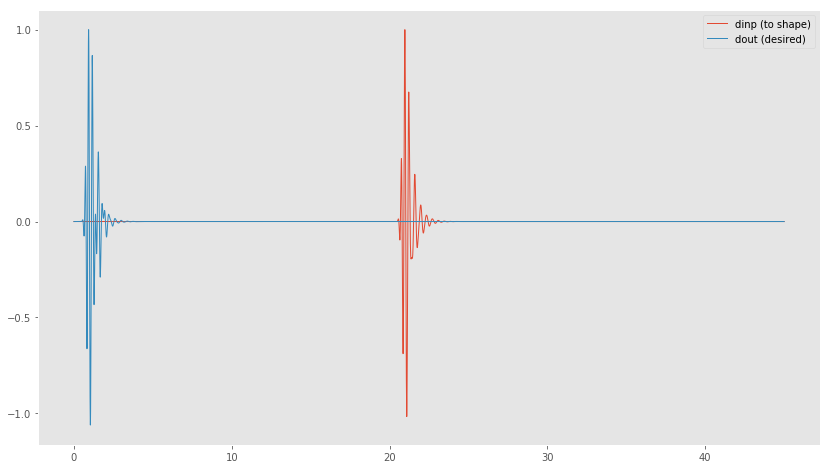

In [192]:
pad_ms = 20000
pad_ns = int(pad_ms / dt / 1000)
# dinp_p = pad_traces(dinp, 2 * pad_ns)
# s0_p = pad_traces(s0, 2 * pad_ns)
# s0_p = su_process(s0, su_pad, dt, pad_ms)
dout_p = pad_traces(dout, 2 * pad_ns)
dinp_p = su_process(dinp, su_pad, dt, pad_ms)
# dout_p = su_process(dout, su_pad, dt, pad_ms)
print(s0_p.shape, dinp_p.shape, dout_p.shape)
# plot(s0_p, dt=dt, norm='max', llabels=['init. guess'])
plot(dinp_p, dt=dt, norm='max', llabels=['dinp (to shape)'])
plot(dout_p, dt=dt, norm='max', llabels=['dout (desired)'])
# plt.xlim(0,4)
plt.legend()

len(shaper) 9000


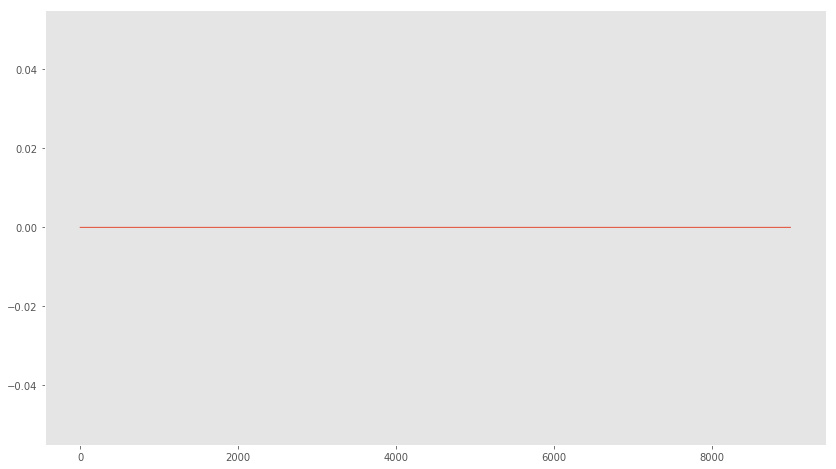

In [194]:
a = su_process(s0_p, su_decon, dt, pnoise=.001,
                    d_inp=dinp_p, d_out=dout)
# plot(a)
b = read_sushaper()
plot(b)

In [163]:
dirac = np.zeros(dinp_p.shape)
dirac[..., dirac.shape[-1]//2] = 1
# INVERSE OF DSYN
wiener = su_process(dout_p, su_decon, dt, 
                    d_inp=dinp_p, 
                    d_out=dirac, 
                    pnoise=.001)
# print(dinp_p.shape, dr.shape, dirac.shape)
dinp_pi = read_sushaper()

# plot(dinp_pi, dt=dt, norm='max')
# plot(wiener, dt=dt, norm='max')

# plt.plot(np.convolve(wiener[0][0], dinp_p[0][0], mode='same'))
# plt.plot(dout_p[0][0])
# plt.xlim(0,1000)

len(shaper) 5000


We are now ready to apply wiener to initiall guess:

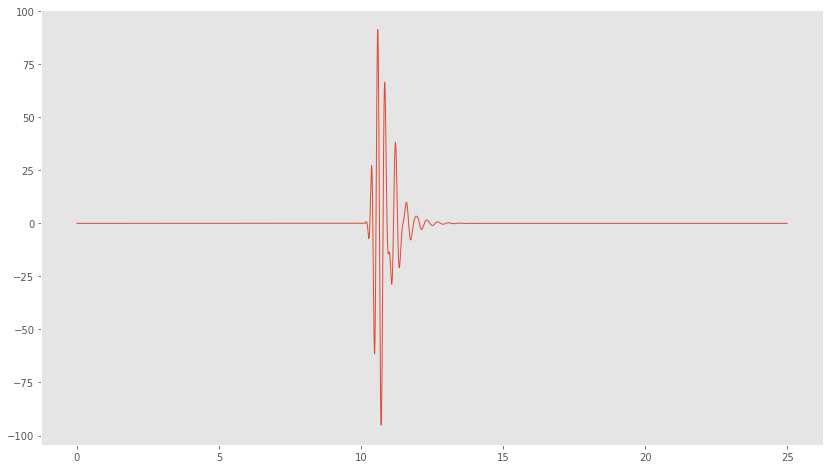

In [170]:
from fullwavepy.ioapi.segy import array2sgy
a = np.convolve(wiener[0][0], s0[0][0], mode='same')
s1 = np.zeros((1,1,len(a)))
s1[0][0] = a
plot(s1, dt=dt)

# s1 = np.array(s1[ :dsyn.shape[-1]])
# array2sgy('s1.sgy', tseries2array(s1), dt)
# plot('s1.sgy', norm='max', llabels=['derived wavelet'])
# plot(s0, norm='max', llabels=['initial guess'])
# plt.xlim(0,1200)
# plt.legend()

## dsyn2

### Input

In [14]:
info = """
Generation of synthetic data to check the wavelet output by the matching filter.
Observed data: stacked clean traces within 100-300 offset, WHOI stations.

"""

In [15]:
proj = ProjSynVsObs('p05_2', paths=paths_kmc, io='sgy', timespace=timespace, info=info)
proj.info.cat()
proj.dims

NameError: name 'ProjSynVsObs' is not defined

In [48]:
args_rawseis = [['../../p05/inp/p05-RawSeis.sgy']]
kwargs_wavelet = {'array': a, 'dt': dt}
kwargs_sp = {'reciprocity': False}
args_truevp = [1500]
proj.inp.prepare(args_rawseis=args_rawseis, 
                 kwargs_wavelet=kwargs_wavelet,
                 args_truevp=args_truevp,
                 kwargs_sp=kwargs_sp
                )

Content of  ./p05_2//inp/p05_2-RawSeis.txt : 
../../p05/inp/p05-RawSeis.sgy
 

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to p05_2
 Preparing files for synthetics...

 Grid points in-line:                    201
 Grid points cross-line:                 206
 Grid points vertically:                 201
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            10000.0000    
 Model width (metres):             10250.0000    
 Model depth (metres):             10000.0000    

 Modelling time step (ms):         5.00000000    
 Output data delta-T (ms):         5.00000000    
 Output data length (ms):          5000.00000    
 Output data length (samples):          1000
 Time steps to model:                   1000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:     

### Output

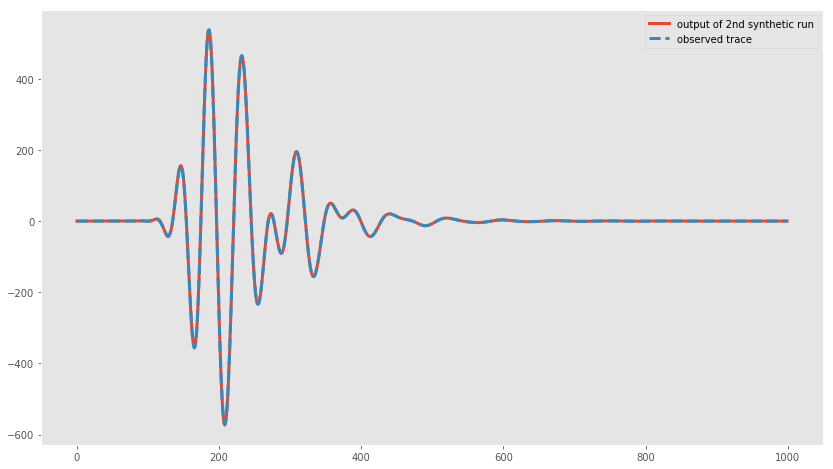

In [84]:
proj.out.synth.plot(lw=3, llabels=['output of 2nd synthetic run'])
proj.inp.outseis.plot(lw=3, ls='--', llabels=['observed trace'])
plt.legend()

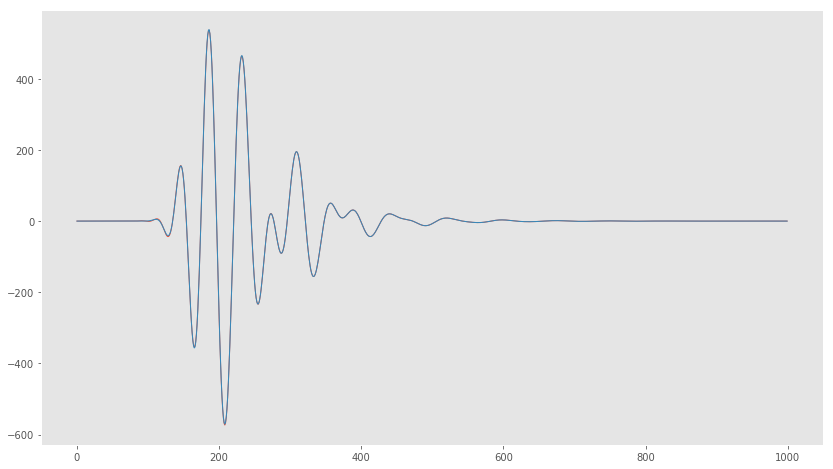

In [51]:
proj.out.synth.plot()
proj.inp.outseis.plot()

# ...